# **Assignment 7 : Gradient boost machines**

Writing a gradient boost machine from scratch for some test data set.

Mirsaeid Abolghasemi

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
from fastai.imports import *
from IPython.display import display
from sklearn import metrics

In [34]:
def std_agg(cnt, s1, s2): 
  return math.sqrt((s2/cnt) - (s1/cnt)**2)

# **Defining DecisionTree class**

In [17]:
class DecisionTree():
    def __init__(self, x, y, idxs = None, min_leaf=2):
        if idxs is None: idxs=np.arange(len(y))
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

# **Simulating the data**

In [18]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

In [25]:
x.shape

(50, 1)

In [19]:
# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

In [27]:
y.shape

(50, 1)

In [31]:
y

array([[14.03380412],
       [14.39065571],
       [13.26277326],
       [13.05791842],
       [14.36863388],
       [12.53805506],
       [10.1931308 ],
       [12.13350621],
       [11.6184084 ],
       [11.55932945],
       [21.18024263],
       [23.10394238],
       [23.98976537],
       [23.80863187],
       [24.13011558],
       [23.66422261],
       [24.78625944],
       [23.99395852],
       [24.64854085],
       [23.47266927],
       [ 1.66072291],
       [ 4.34611211],
       [ 2.72858037],
       [ 4.67835938],
       [ 0.74833466],
       [ 2.93559762],
       [ 3.24434629],
       [ 0.18166335],
       [ 3.48031076],
       [ 3.79582955],
       [30.31185806],
       [30.5439066 ],
       [30.38030809],
       [31.59447183],
       [31.23439902],
       [31.22869797],
       [31.16054264],
       [30.74245141],
       [30.84598166],
       [30.32919658],
       [13.38887641],
       [13.08500657],
       [14.68623215],
       [15.24519389],
       [14.32376785],
       [16

# **Showing the scatter plot of the data**


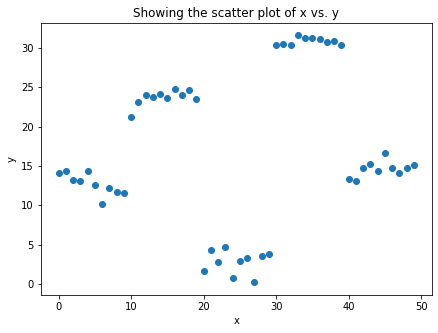

In [32]:
plt.figure(figsize=(7,5))
plt.plot(x,y, 'o')
plt.title("Showing the scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# **Steps for Gradient Boosting (DecisionTrees in a loop)**

In [ ]:
xi = x # initialization of input
yi = y # initialization of target
# x,y --> use where no need to change original y
ei = 0 # initialization of error
n = len(yi)  # number of rows
predf = 0 # initial prediction 0

## **1. Fitting a simple linear regressior or decision tree on data**
**2. Calculating error residuals**

Actual target value minus predicted target value: 

e1 = y - predf  

**3. Fitting a new model on error residuals as target variables with same input variables**

 yi = ei

**4. Adding the predicted residual to the previous predictions**

predf = predf + predi


**5. Fitting another model on redisuals that still left**

e2 = y - predf  

(continue in a "for" loop)



# **Results for 30 estimators**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

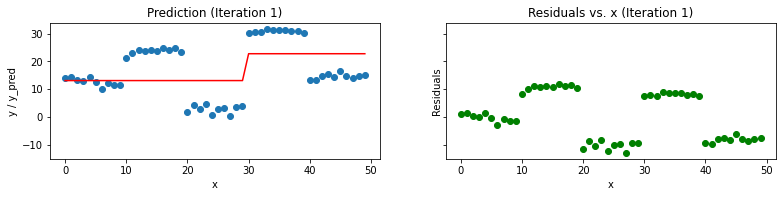

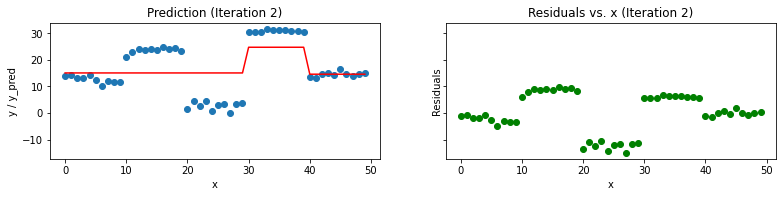

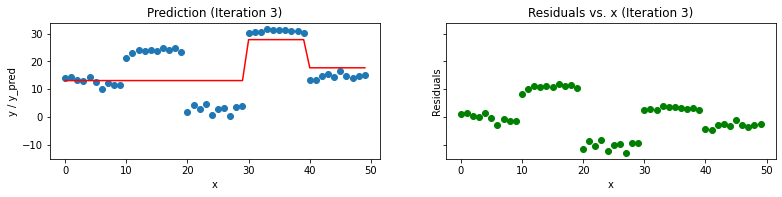

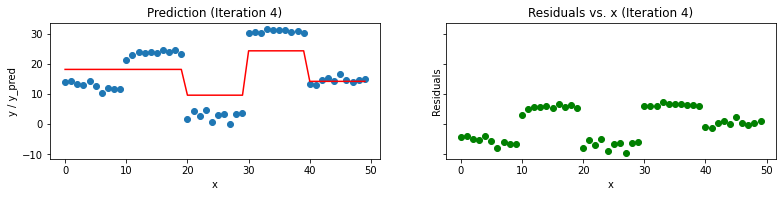

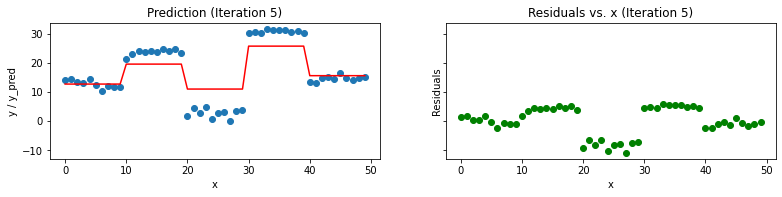

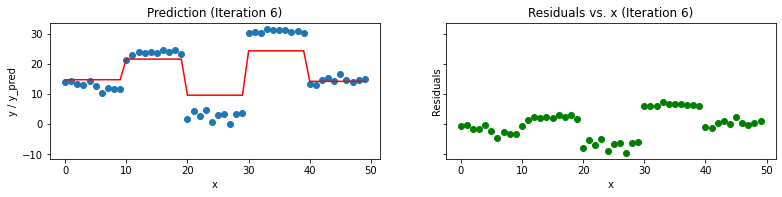

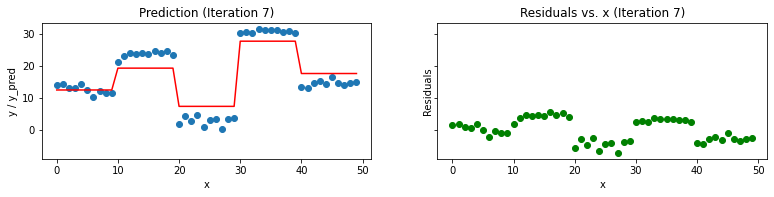

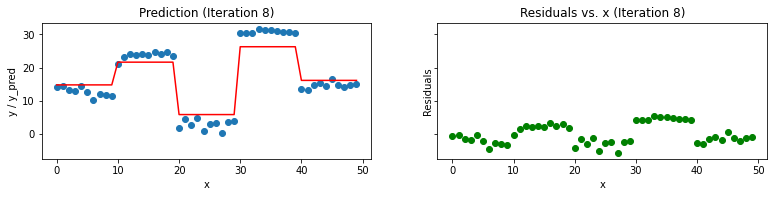

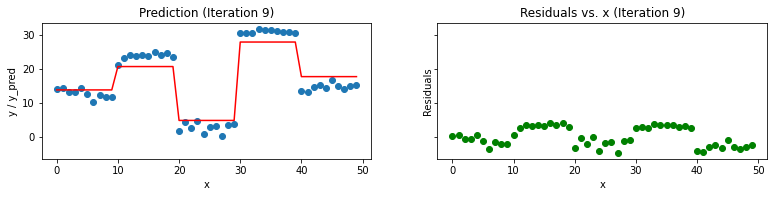

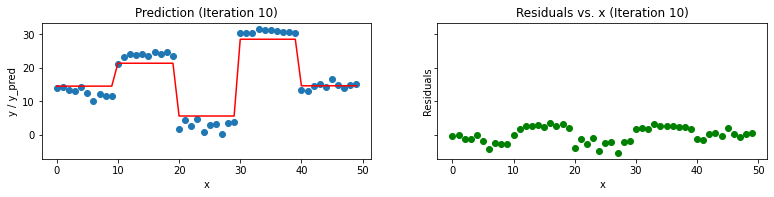

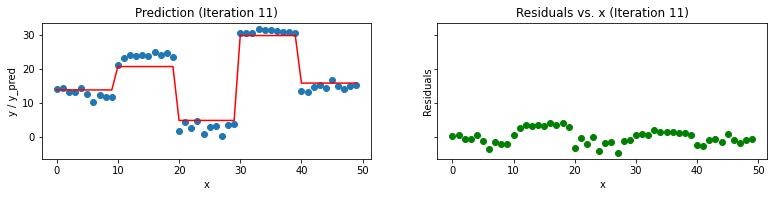

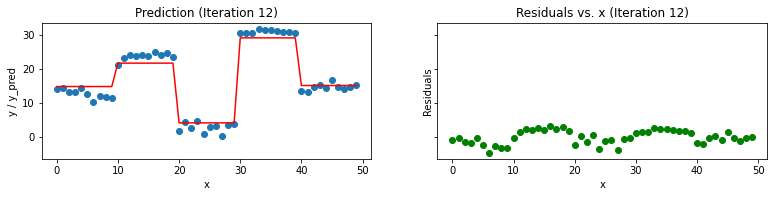

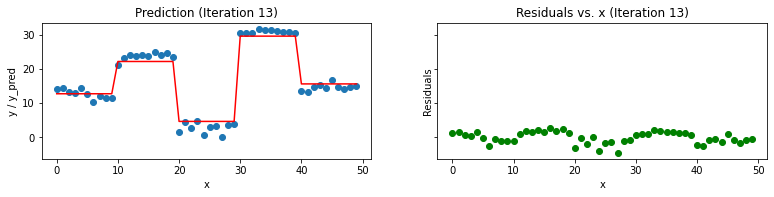

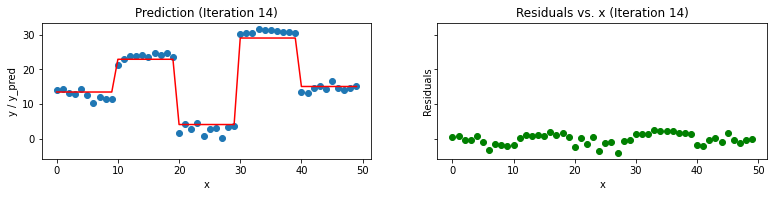

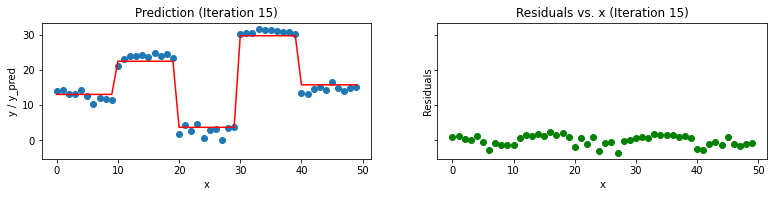

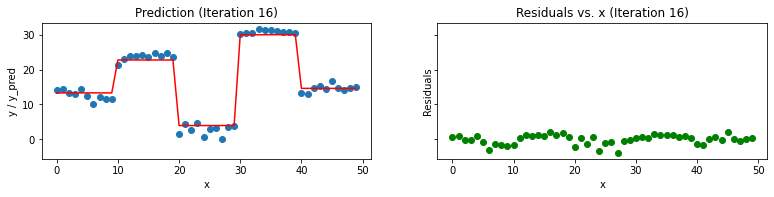

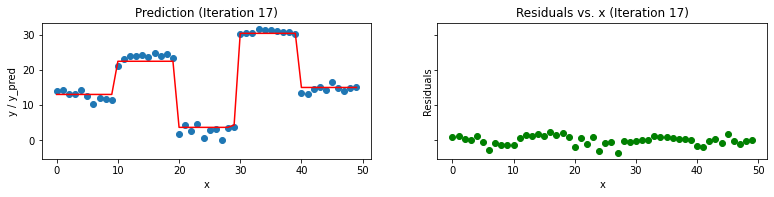

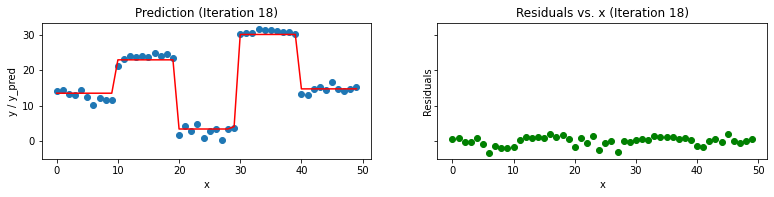

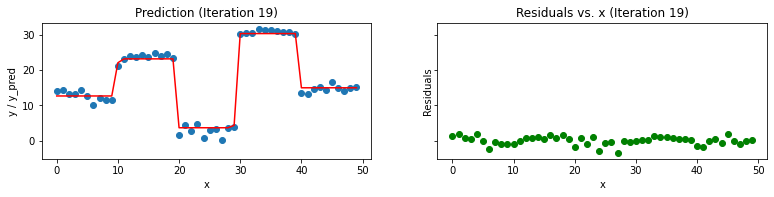

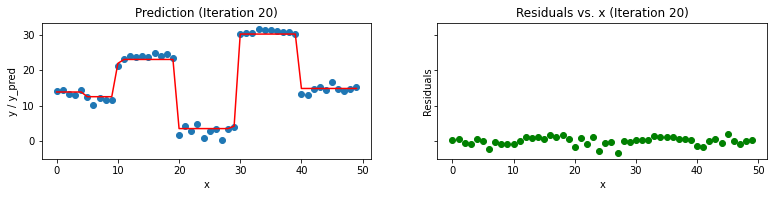

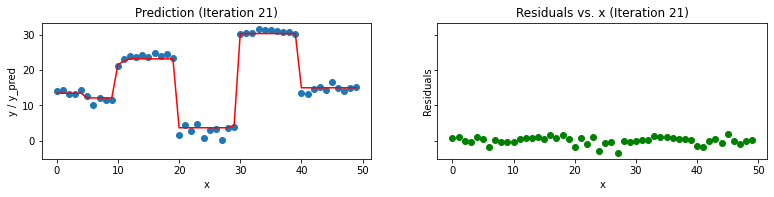

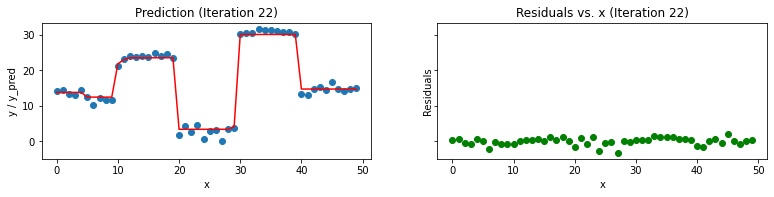

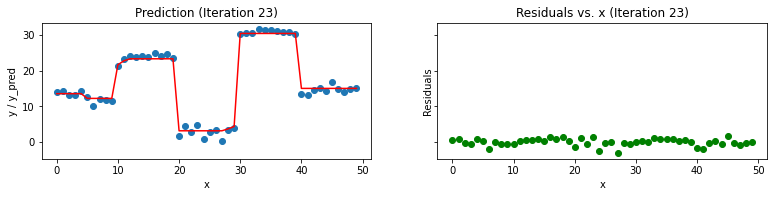

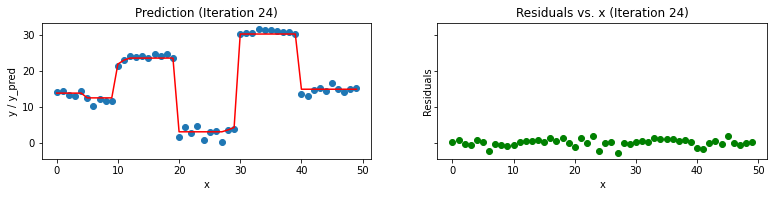

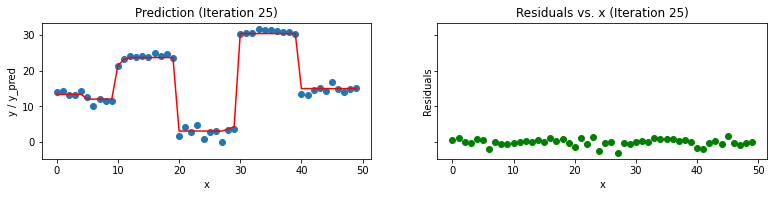

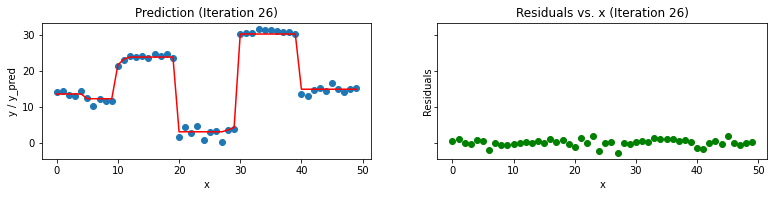

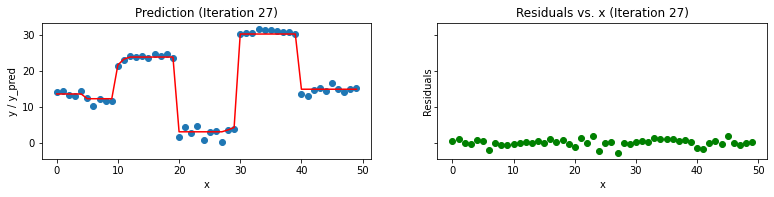

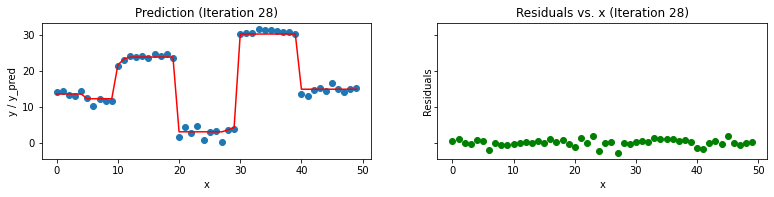

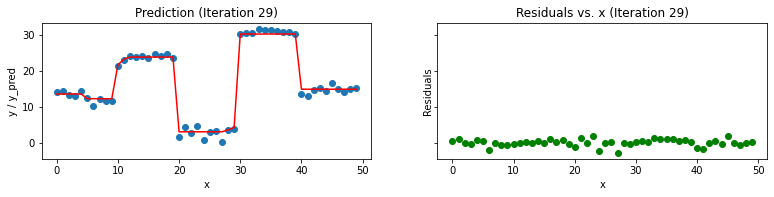

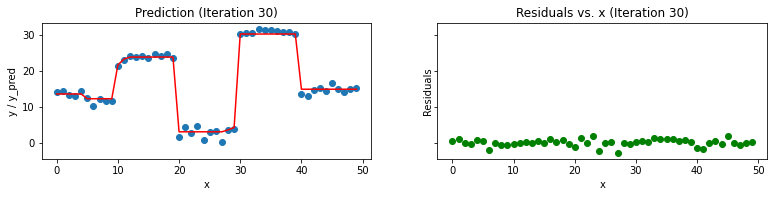

In [21]:
for i in range(30): # loop will make 30 trees (n_estimators). 
    # (1)
    tree = DecisionTree(xi,yi) # DecisionTree scratch code can be found in shared github/kaggle link. 
                               # It just create a single decision tree with provided min. sample leaf
    tree.find_better_split(0)  # For selected input variable, this splits (<n and >n) data so that std. deviation of 
                               # target variable in both splits is minimum as compared to all other splits
    
    r = np.where(xi == tree.split)[0][0]   #  finds index where this best split occurs
    
    left_idx = np.where(xi <= tree.split)[0] # index lhs of split
    right_idx = np.where(xi > tree.split)[0] # index rhs of split
    
    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
    
    predi = predi[:,None]  # make long vector (nx1) in compatible with y
    predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual
    
    ei = y - predf  # needed originl y here as residual always from original y    
    yi = ei # update yi as residual to reloop
    
    
    # plotting after prediction
    xa = np.array(x.x) # column name of x is x 
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]
    
    #epreds = np.array(epred[:,None])[order]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')

# **Results for 50 estimators**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

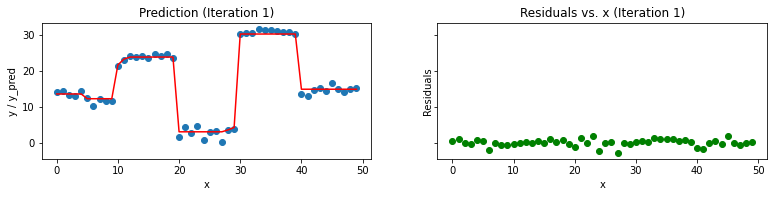

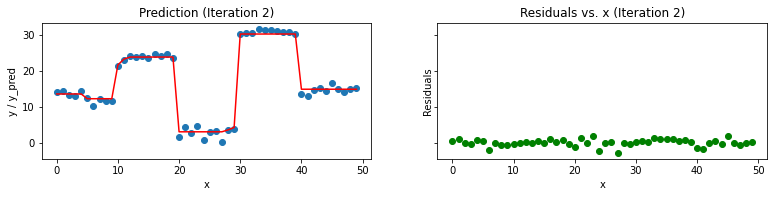

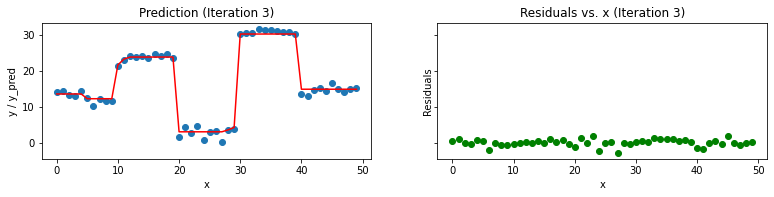

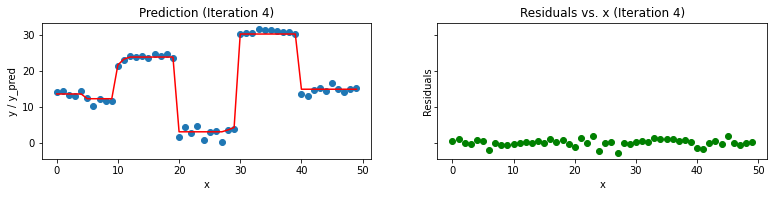

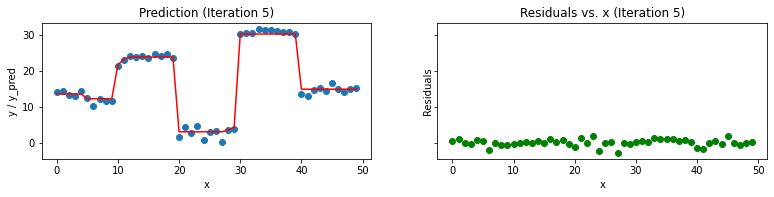

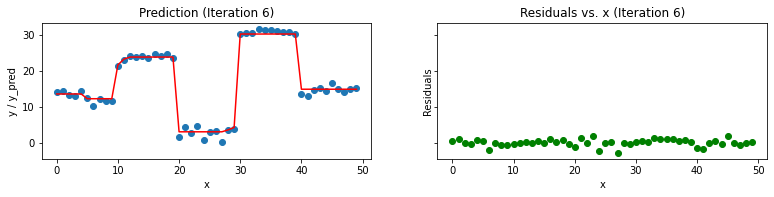

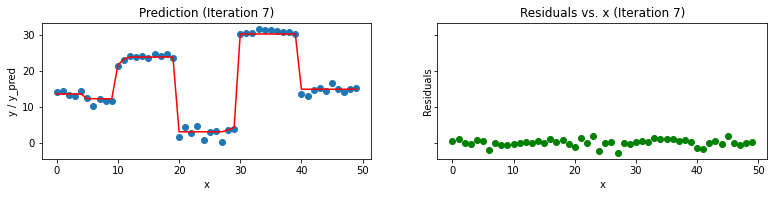

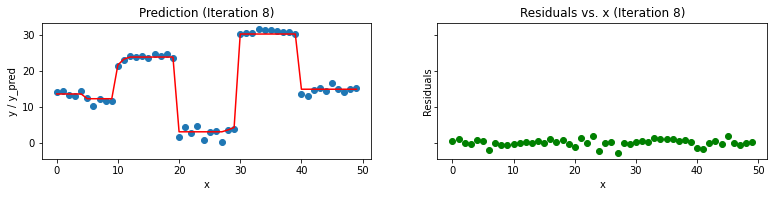

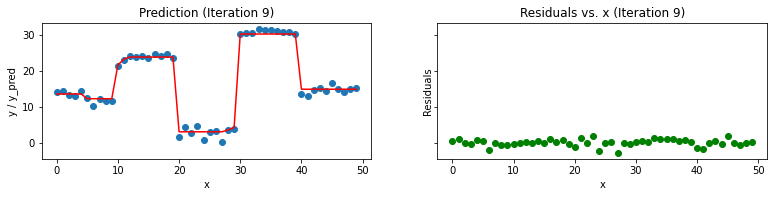

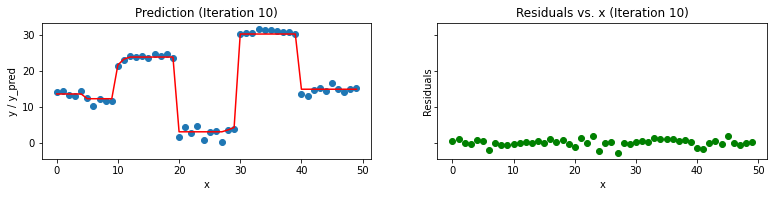

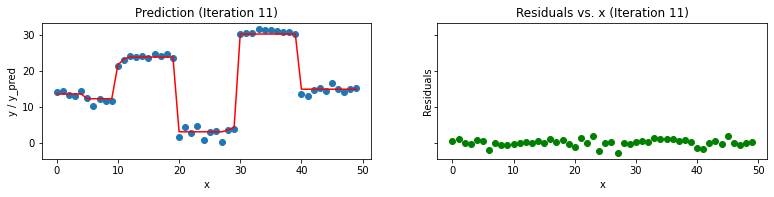

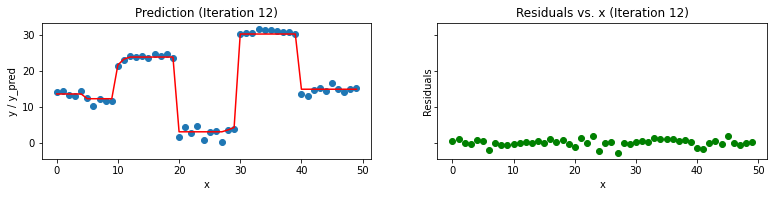

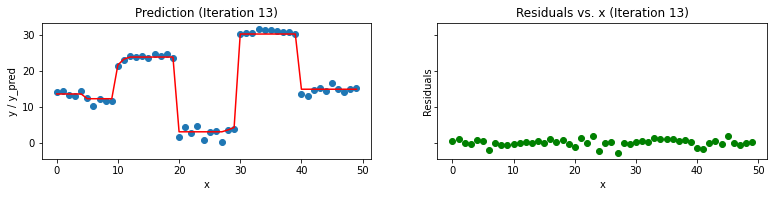

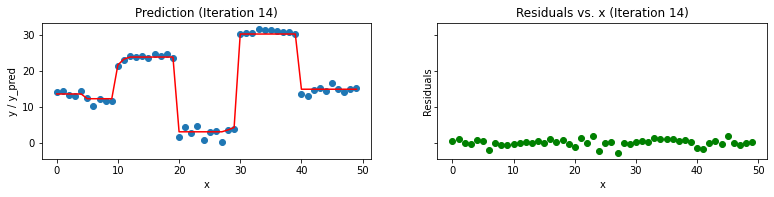

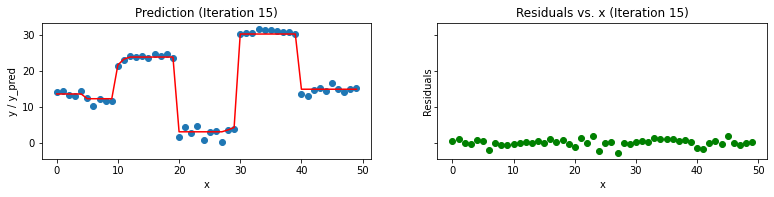

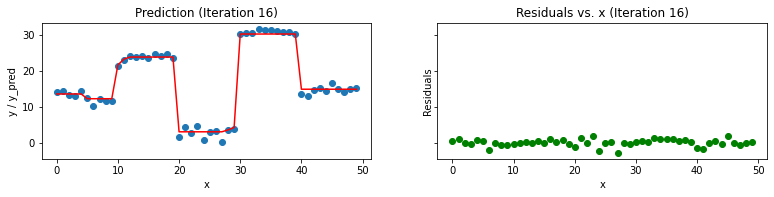

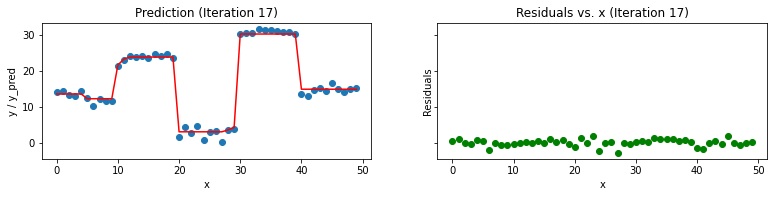

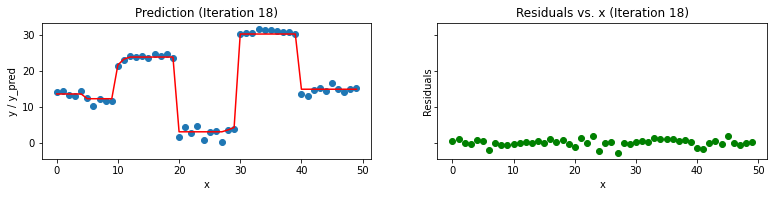

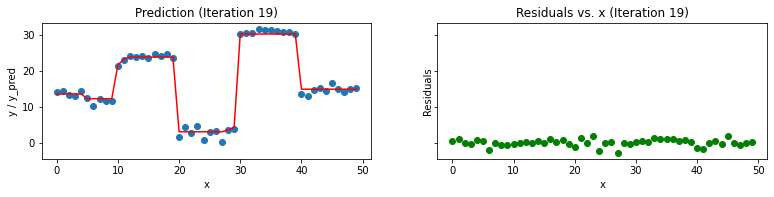

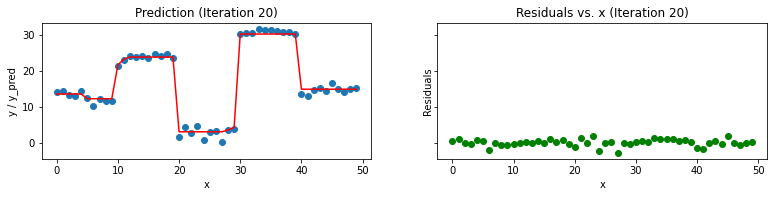

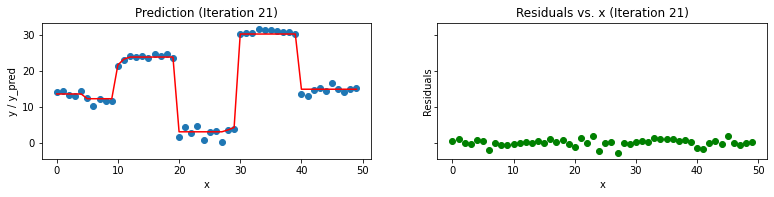

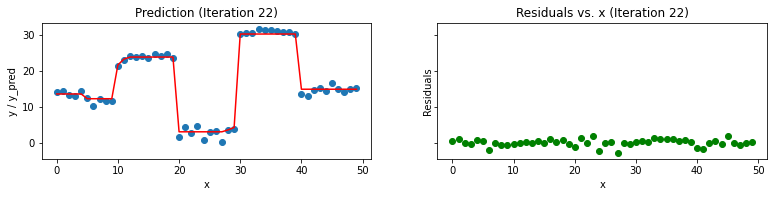

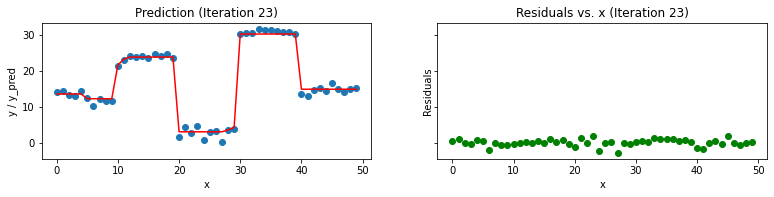

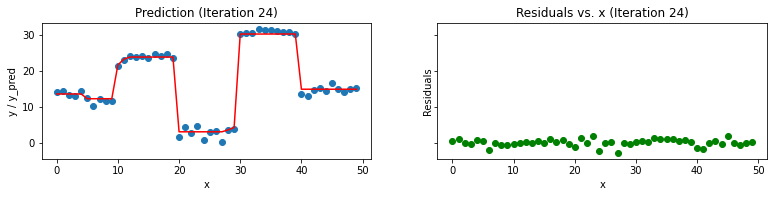

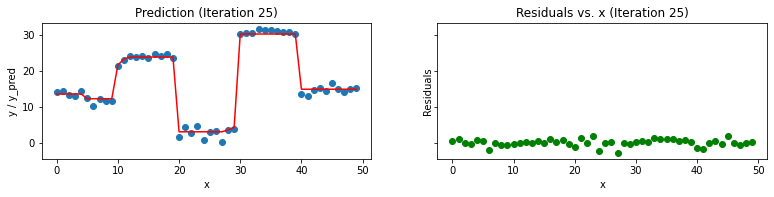

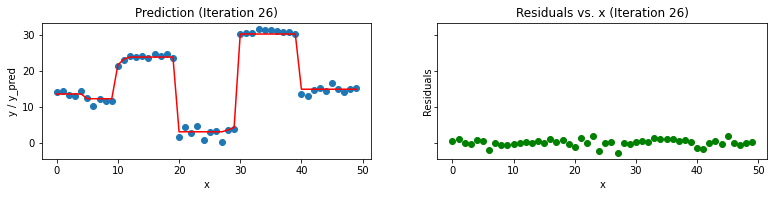

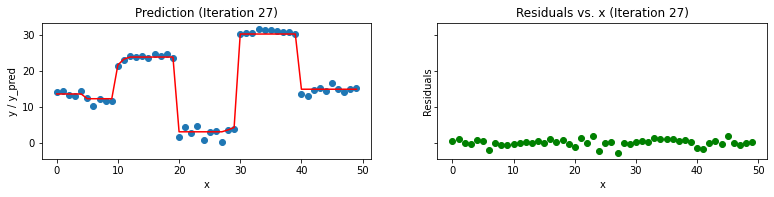

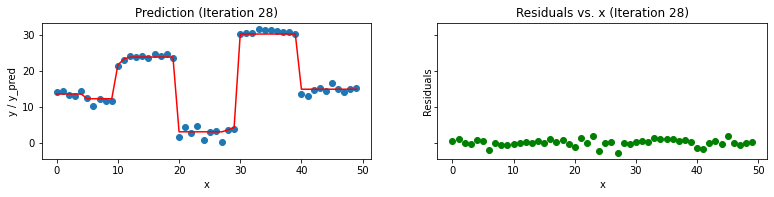

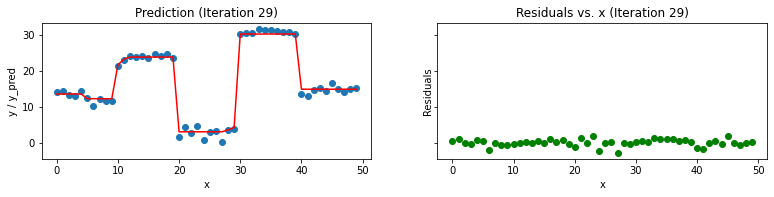

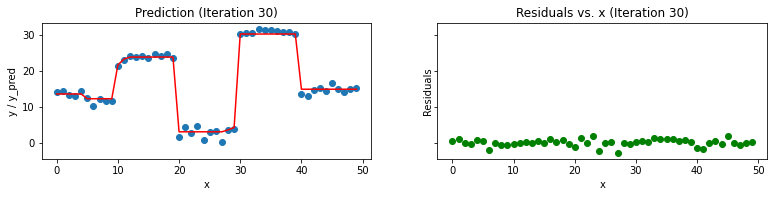

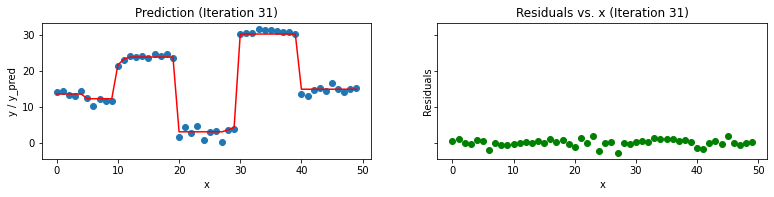

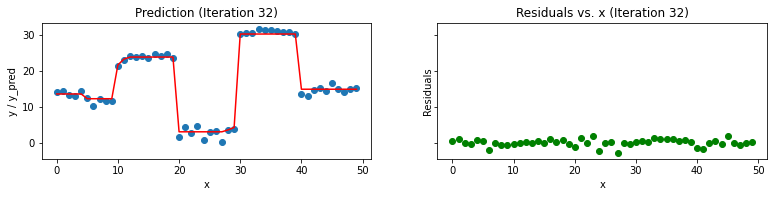

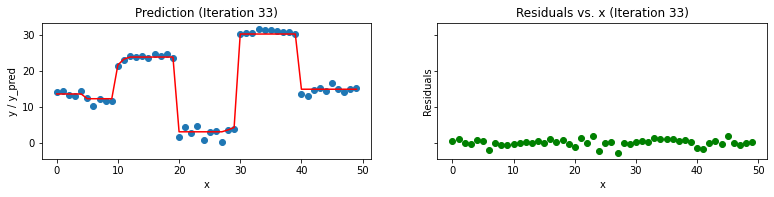

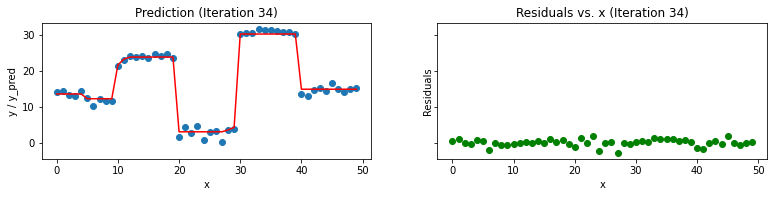

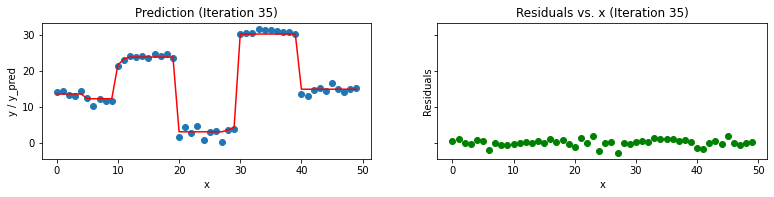

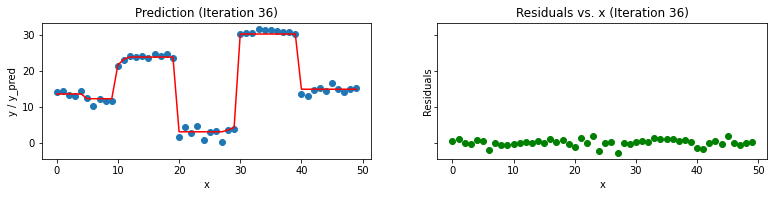

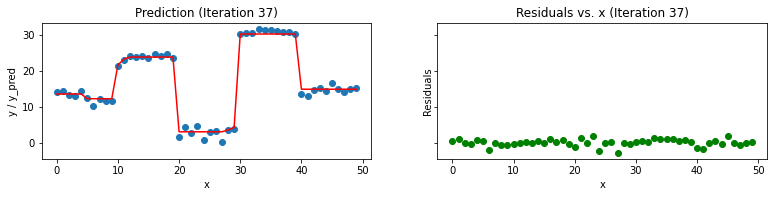

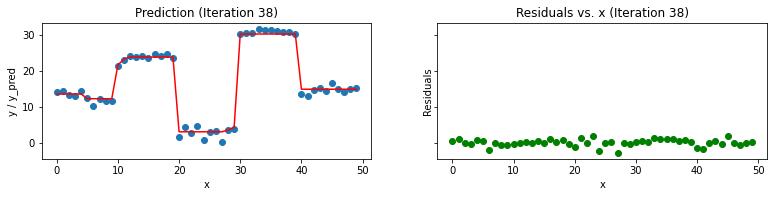

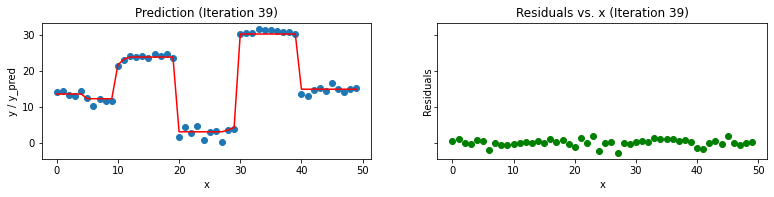

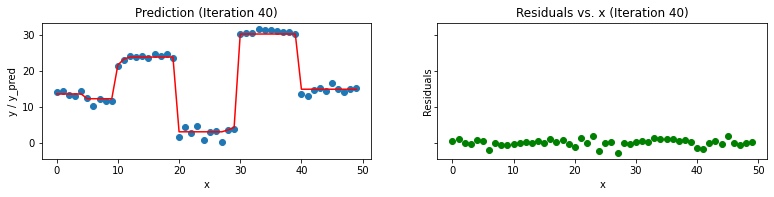

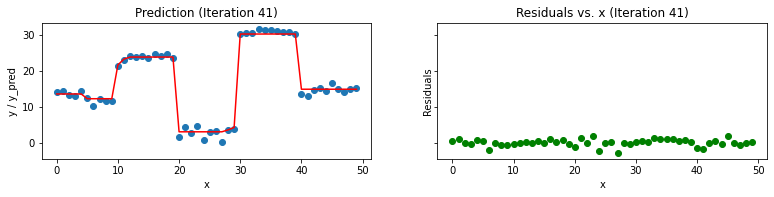

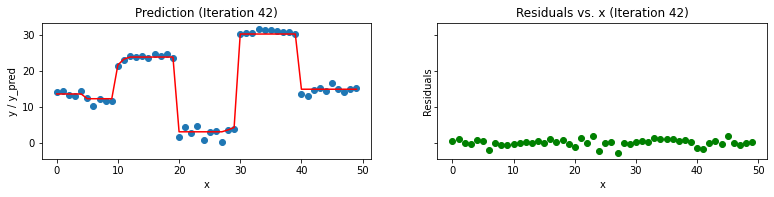

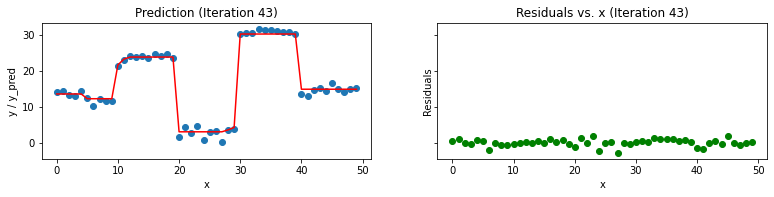

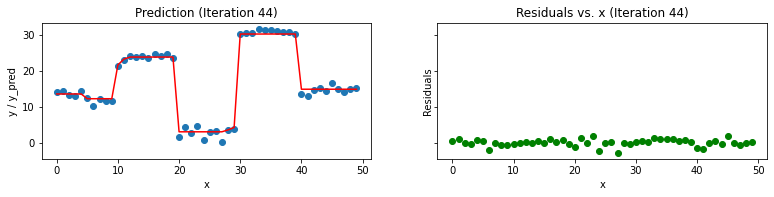

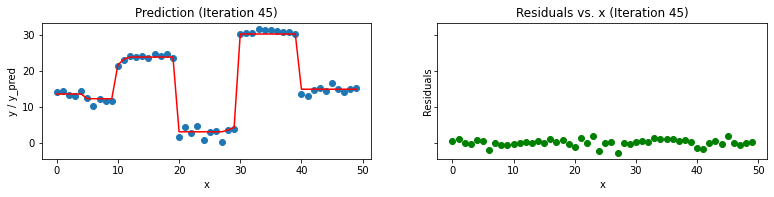

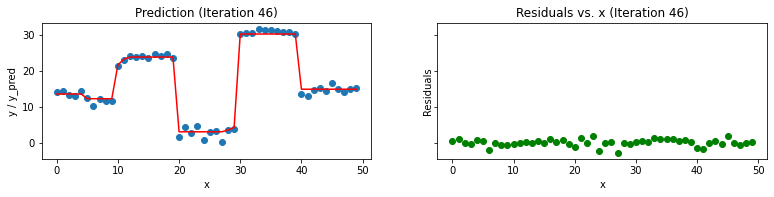

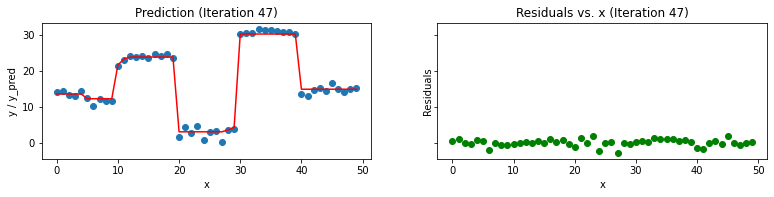

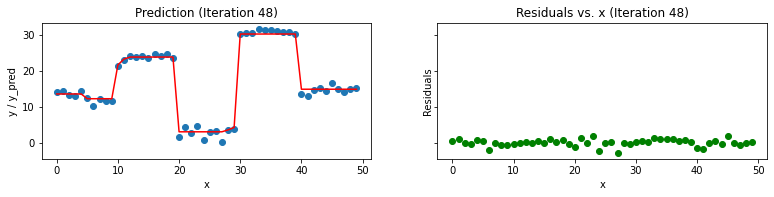

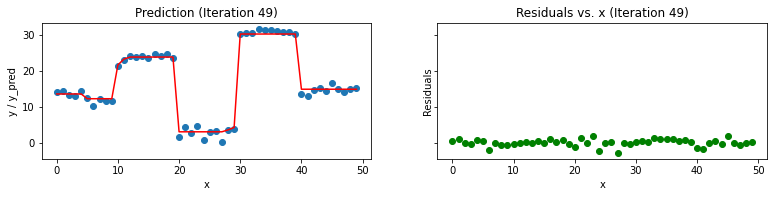

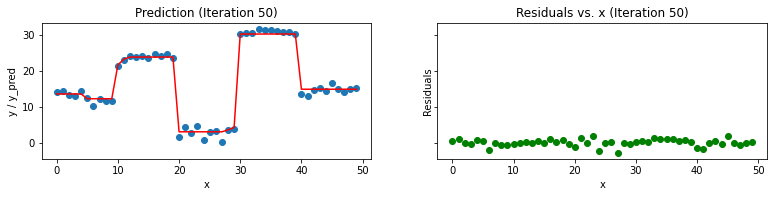

In [33]:
for i in range(50): # loop will make 50 trees (n_estimators). 
    # (1)
    tree = DecisionTree(xi,yi) # DecisionTree scratch code can be found in shared github/kaggle link. 
                               # It just create a single decision tree with provided min. sample leaf
    tree.find_better_split(0)  # For selected input variable, this splits (<n and >n) data so that std. deviation of 
                               # target variable in both splits is minimum as compared to all other splits
    
    r = np.where(xi == tree.split)[0][0]   #  finds index where this best split occurs
    
    left_idx = np.where(xi <= tree.split)[0] # index lhs of split
    right_idx = np.where(xi > tree.split)[0] # index rhs of split
    
    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
    
    predi = predi[:,None]  # make long vector (nx1) in compatible with y
    predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual
    
    ei = y - predf  # needed originl y here as residual always from original y    
    yi = ei # update yi as residual to reloop
    
    
    # plotting after prediction
    xa = np.array(x.x) # column name of x is x 
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]
    
    #epreds = np.array(epred[:,None])[order]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')